## 🔶Mineria de DatosPreprocesamiento con  PySpark

### 🙋‍♀️ Alumna : Leydi Diana Choque Sarmiento

### 🔰Librerias


In [2]:
import numpy as np
import math
from pyspark import SparkConf 
from pyspark.context import SparkContext 
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from functools import reduce
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler

## 🔰 1. Normalizacion
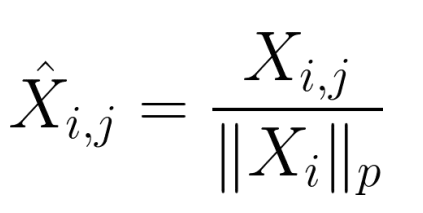


In [3]:
#Modulo para normalizar los elementos de un RDD: Tiene como entrada un arreglo RDD y como salida este arreglo normalizado
def normalizacion(x):
    listaCuadrada=x.map(lambda xi:xi*xi)
    total=listaCuadrada.sum()
    val=math.sqrt(total)
    lista= x.map(lambda xi :(xi/val))
    return lista
#coomprobamos con un ejemplo
Vector= sc.parallelize(range(1,20),4)
VectorEscalonada=normalizacion(Vector)
#mostrar resultado en este caso normalizaremos un arreglo de numeros aleatorios entre 1 y 20
VectorEscalonada.collect()

[0.020121090914638342,
 0.040242181829276684,
 0.06036327274391503,
 0.08048436365855337,
 0.10060545457319171,
 0.12072654548783006,
 0.1408476364024684,
 0.16096872731710674,
 0.18108981823174508,
 0.20121090914638343,
 0.22133200006102177,
 0.24145309097566012,
 0.26157418189029846,
 0.2816952728049368,
 0.30181636371957515,
 0.32193745463421347,
 0.34205854554885184,
 0.36217963646349016,
 0.3823007273781285]

## 🔰 2. Binario

In [6]:
# Modulo para extraer  los elementos string para convertirlo a un arreglo de tuplas
def Binario(Doc):
    val=map(lambda x:(x,1),Doc)
    return list(val)

A=[["Perisic","Carlos","Messi","Ronaldo","Salvio","McKennie"]
    ,["Pedro","Cazorla"]]
ejemplo=A[0]
(Binario(ejemplo))
Vec = sc.parallelize(A,4)
Vec2 = Vec.map(lambda x:Binario(x))
Vec2.collect()

[[('Perisic', 1),
  ('Carlos', 1),
  ('Messi', 1),
  ('Ronaldo', 1),
  ('Salvio', 1),
  ('McKennie', 1)],
 [('Pedro', 1), ('Cazorla', 1)]]

## 🔰 3. Escalamiento
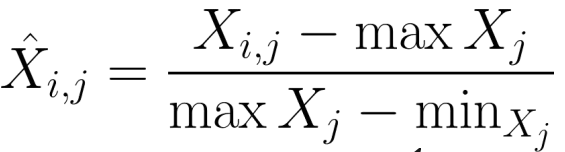

In [11]:
#modulo para escalar los elementos de un RDD y retrorna un arreglo de elementos escalonados
def escalamiento(x):
    #se obtiene elemento minumo y maximo del RDD
    minimo = x.min()
    maximo = x.max()
    #escalonamos cada elemento con la funion map
    lista= x.map(lambda xi : (xi-minimo)/(maximo-minimo))
    return lista 
#ejemplo aplicando al mismo  ejmplo del la normalizacion con valores alatoriosentre 1 y 20
Vector= sc.parallelize(range(1,20),4)
VectorEscalonada=normalizacion(Vector)
#mostrar resultado en este caso normalizaremos un arreglo de numeros aleatorios entre 1 y 20
VectorEscalonada.collect()

[0.020121090914638342,
 0.040242181829276684,
 0.06036327274391503,
 0.08048436365855337,
 0.10060545457319171,
 0.12072654548783006,
 0.1408476364024684,
 0.16096872731710674,
 0.18108981823174508,
 0.20121090914638343,
 0.22133200006102177,
 0.24145309097566012,
 0.26157418189029846,
 0.2816952728049368,
 0.30181636371957515,
 0.32193745463421347,
 0.34205854554885184,
 0.36217963646349016,
 0.3823007273781285]

## 🔰 4. Similitud de cosenos

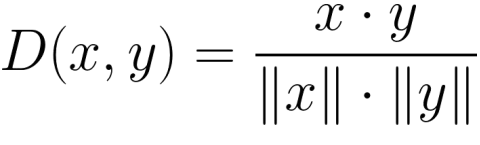

In [5]:
#Para este modulo necesitamos un modulo que calcule producto punto de dos arrays
def punto(x,y):
    return x.zip(y).map(lambda x: x[0]*x[1]).reduce(lambda x , y :x+y)
#Moduloo de distacia de cosenos que calcula la ditancia de dos elementos de un RDD, este modulo retorna 
def SimilitudCosenos(x,y):
    #Utilizando el modulo de producto punto hallamos el denomindor y el numerador   
    num=punto(x,y)
    den=punto(x,x)*punto(y,y)
    return num/den

#Ejemplo con valores de x e y entre 0 a 100 y 100 a 200 respectivamente
x = sc.parallelize(range(0,100),4)
y = sc.parallelize(range(100, 200),4)
#mostrar resultado
print(SimilitudCosenos(x,y))



1.0816044550832321e-06


## 5.Distancia de Minkowski
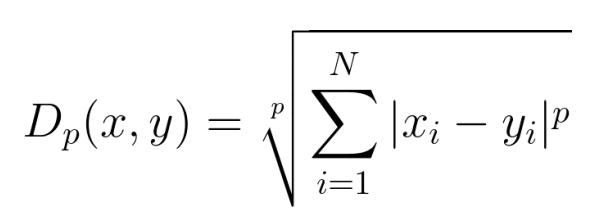

In [7]:
# Primero crearemos un modulo para hacer opreciones de potencia aplicado a un parametro
def Power(p):
    def Dist(x,y):
        return np.power(np.power(np.abs(x-y),p).sum(),1/float(p))
    return Dist
# Creamos un RDD con valores aleatorios
# Creemos un RDD con valores numéricos.
np.random.seed(20)
num_p = sc.parallelize(enumerate(np.random.random(size=(100,500))))
# Teniendo un modulo que hace las opreciones de potencia calculamos la distancia Minkowski 
dat_p = num_p.cartesian(num_p)
dato_p = dat_p.map(lambda x: ((x[0][0],x[1][0]), (x[0][1],x[1][1])))

# El valor de p puede tomar diferenctes valores miesntras pse igual a 1 se parece mas a la distancia de Manhattan
# Mientras p tome el valor de 2 mas se parece a la distancia ecuclideana
#Para este caso tenemos:
p=5
Minkowski = Power(p)
dist = dato_p.map(lambda x: (x[0], Minkowski(x[1][0],x[1][1])))
soluc = dist.map(lambda x: x[1])
minv, maxv, meanv = soluc.min(), soluc.max(), soluc.mean()

print('Min valor de Minkowski: ',minv)
print('Max valor de Minkowki: ',maxv)
print('Media de los valores minkowski: ',meanv)


Min valor de Minkowski:  0.0
Max valor de Minkowki:  1.9967644713518153
Media de los valores minkowski:  1.8632500224411412
